## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

## Reading the dataset

### Feature Description

* Order ID - Contains unique order of each purchases.
* Product - Name of the product purchased.
* Quantity Ordered - Number of products purchased.
* Price Each - Price of each product purchased.
* Order Date - Date when the product was purchased.
* Purchase Address - Address of the purchased customer.

In [2]:
data = pd.read_csv('sales_full_data.csv') # reading the csv file
data.head() # first 5 rows

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04-07-19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04-12-19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
print('The dataset has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The dataset has 186850 rows and 6 columns


In [4]:
# checking the datatype of the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


Here we can see that columns like Order ID, Quantity Ordered, Price Each are numeric in nature but represented as object type. It must be conveted before starting the analysis.

## Data Preprocessing

In [5]:
# converting all the characters to lower case in the column name
# replacing space with underscore for readability

data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['order_id', 'product', 'quantity_ordered', 'price_each', 'order_date',
       'purchase_address'],
      dtype='object')

In [6]:
data.isna().sum()

order_id            545
product             545
quantity_ordered    545
price_each          545
order_date          545
purchase_address    545
dtype: int64

Since all the columns have the same number of na values we check whether they also have the same indices.

In [7]:
# checking whether all the na rows are same

missing_order = data[data['order_id'].isna()].index.tolist() # converting the array of indices to list
missing_product = data[data['product'].isna()].index.tolist() # converting the array of indices to list

if missing_order == missing_product:
    print('Same')
else:
    print('Different')

Same


In [8]:
# we can drop the na values since they are all the same rows

data.dropna(subset = ['order_id', 'product'], inplace = True)

In [9]:
data.isna().sum() # checking the na values

order_id            0
product             0
quantity_ordered    0
price_each          0
order_date          0
purchase_address    0
dtype: int64

### Order ID

In [10]:
# inspecting the order_id column

data['order_id'].value_counts()

Order ID    355
160873        5
312407        4
242936        4
194253        4
           ... 
282255        1
154043        1
218338        1
145401        1
173516        1
Name: order_id, Length: 178438, dtype: int64

We can see that 355 rows have a Order ID as a value which is not a proper value for the column.

In [11]:
# Let's check deeply into the order_id column

data[data['order_id'] == 'Order ID']

,order_id,product,quantity_ordered,price_each,order_date,purchase_address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
# getting the index values of the above dataframe

order_index = data[data['order_id'] == 'Order ID'].index

From the above dataframe we can see that they are errors and can be removed from the original data.

In [13]:
data.drop(index = order_index, inplace = True) # dropping all the index of irregular rows

### Product

In [14]:
# inspecting the product column

data['product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: product, dtype: int64

Seems there is no problem with the product column.

### Quantity Ordered

In [15]:
# inspecting the quantity_ordered column

data['quantity_ordered'].value_counts()

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: quantity_ordered, dtype: int64

Quantity Ordered column also has no problem that is needed to be handled.

### Price Each

In [16]:
data['price_each'].value_counts()

11.95     21903
14.95     21658
2.99      20641
3.84      20577
11.99     18882
150       15549
99.99     13325
149.99     7507
700        6842
600        6837
389.99     6230
379.99     6181
300        4800
1700       4724
999.99     4128
109.99     4101
400        2065
Name: price_each, dtype: int64

Since all the numeric columns are perfect we can convert their datatype to numeric type

In [17]:
data['order_id'] = data['order_id'].astype(int)
data['quantity_ordered'] = data['quantity_ordered'].astype(int)
data['price_each'] = data['price_each'].astype(float)

In [18]:
data.info() # checking after conversion

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   order_id          185950 non-null  int32  
 1   product           185950 non-null  object 
 2   quantity_ordered  185950 non-null  int32  
 3   price_each        185950 non-null  float64
 4   order_date        185950 non-null  object 
 5   purchase_address  185950 non-null  object 
dtypes: float64(1), int32(2), object(3)
memory usage: 8.5+ MB


### Order Date

In [19]:
# inspecting order_date column

data['order_date']

0         04/19/19 08:46
2         04-07-19 22:30
3         04-12-19 14:38
4         04-12-19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09-01-19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: order_date, Length: 185950, dtype: object

Since this column is a timestamp we need to convert it into datetime format

In [20]:
data['order_date'] = pd.to_datetime(data['order_date']) # conversion to datetime format
data['order_date']

0        2019-04-19 08:46:00
2        2019-04-07 22:30:00
3        2019-04-12 14:38:00
4        2019-04-12 14:38:00
5        2019-04-30 09:27:00
                 ...        
186845   2019-09-17 20:56:00
186846   2019-09-01 16:00:00
186847   2019-09-23 07:39:00
186848   2019-09-19 17:30:00
186849   2019-09-30 00:18:00
Name: order_date, Length: 185950, dtype: datetime64[ns]

In [21]:
# getting the day, month and year from the datetime object of order_date

data['order_day_num'] = data['order_date'].dt.day # getting the date of the month (1,2,3,...)
data['order_month'] = data['order_date'].dt.month # getting the month number (1,2,...12)
data['order_year'] = data['order_date'].dt.year # getting the year

# getting the day of the week
# Monday is 0 and Sunday is 6

data['order_day_name'] = data['order_date'].dt.weekday

In [22]:
# getting the hour and minute from the timestamp 

data['order_time_hour'] = data['order_date'].dt.hour
data['order_time_min'] = data['order_date'].dt.minute

Since we got all the required information from the timestamp we can delete that column

In [23]:
data.drop(columns = 'order_date', inplace = True)

In [24]:
data.head()

,order_id,product,quantity_ordered,price_each,purchase_address,order_day_num,order_month,order_year,order_day_name,order_time_hour,order_time_min
0,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",19,4,2019,4,8,46
2,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",7,4,2019,6,22,30
3,176560,Google Phone,1,600.00,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,4,14,38
4,176560,Wired Headphones,1,11.99,"669 Spruce St, Los Angeles, CA 90001",12,4,2019,4,14,38
5,176561,Wired Headphones,1,11.99,"333 8th St, Los Angeles, CA 90001",30,4,2019,1,9,27


### Purchase Address

We can purchase address column to obtain information like street name and number, state name etc.

In [25]:
# street name from address
data['street_name'] = data['purchase_address'].apply(lambda x:' '.join(x.split(', ')[0].split()[1:]))

# city name from address
data['city_name'] = data['purchase_address'].apply(lambda x:x.split(', ')[1])

# state name from address
data['state_name'] = data['purchase_address'].apply(lambda x:x.split()[-2])

# zip code from address
data['zip_code'] = data['purchase_address'].apply(lambda x:x.split()[-1])

In [26]:
# since we got all the information from address we can delete the purchase_address column

data.drop(columns = ['purchase_address'], inplace = True) # dropping purchase_address and updating the dataframe

In [27]:
data.head()

,order_id,product,quantity_ordered,price_each,order_day_num,order_month,order_year,order_day_name,order_time_hour,order_time_min,street_name,city_name,state_name,zip_code
0,176558,USB-C Charging Cable,2,11.95,19,4,2019,4,8,46,1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,7,4,2019,6,22,30,Chestnut St,Boston,MA,02215
3,176560,Google Phone,1,600.00,12,4,2019,4,14,38,Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,12,4,2019,4,14,38,Spruce St,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,30,4,2019,1,9,27,8th St,Los Angeles,CA,90001


### Total Price

We can find the total price for an individual order by finding the product of quantity_ordered and price_each

In [28]:
data['total_price'] = data['quantity_ordered']*data['price_each']
data['total_price']

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: total_price, Length: 185950, dtype: float64

In [29]:
data.drop_duplicates(subset = data.columns, keep = 'first', inplace = True) # dropping the duplicate rows

## Exploratory Data Analysis

In [30]:
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True, font_scale = 0.75)

### Month with highest and lowest sales

In [31]:
monthly_sales = data.groupby('order_month')['total_price'].agg(np.sum).reset_index()
monthly_sales

,order_month,total_price
0,1,1.821413e+06
1,2,2.200078e+06
2,3,2.804973e+06
3,4,3.389218e+06
4,5,3.150616e+06
5,6,2.576280e+06
6,7,2.646461e+06
7,8,2.241083e+06
8,9,2.094466e+06
9,10,3.734778e+06


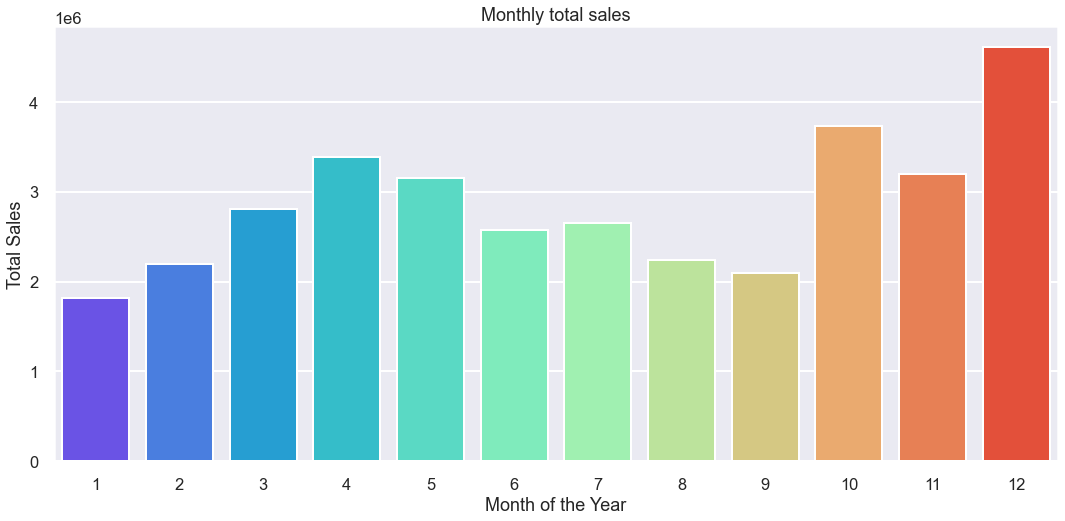

In [32]:
plt.figure(figsize = (18, 8)) # size of the plot

# barplot
sns.barplot(x = monthly_sales['order_month'], y = monthly_sales['total_price'], palette = 'rainbow')
plt.title('Monthly total sales') # title
plt.xlabel('Month of the Year') # xlabel
plt.ylabel('Total Sales') # ylablel

plt.show()

__Observations:__

* Here we can see that December has the highest number of sales. The main for this can be people buying presents for christmas and new year.
* January has the lowest total sales. The reason can be that people might have spend most of their earnings for Christmas and New Year.
* Sales was good at the end of the year because there are many public holidays and festivals like Thanksgiving, Halloween, Christmas, New Year etc.

### Most sold product

In [33]:
data.head(2)

,order_id,product,quantity_ordered,price_each,order_day_num,order_month,order_year,order_day_name,order_time_hour,order_time_min,street_name,city_name,state_name,zip_code,total_price
0,176558,USB-C Charging Cable,2,11.95,19,4,2019,4,8,46,1st St,Dallas,TX,75001,23.90
2,176559,Bose SoundSport Headphones,1,99.99,7,4,2019,6,22,30,Chestnut St,Boston,MA,02215,99.99


In [34]:
products_sold = data.groupby('product')['quantity_ordered'].agg(np.sum).reset_index().sort_values(by = 'quantity_ordered',
                                                                                 ascending = False)
products_sold

,product,quantity_ordered
5,AAA Batteries (4-pack),30986
4,AA Batteries (4-pack),27615
15,USB-C Charging Cable,23931
12,Lightning Charging Cable,23169
17,Wired Headphones,20524
6,Apple Airpods Headphones,15637
7,Bose SoundSport Headphones,13430
2,27in FHD Monitor,7541
18,iPhone,6847
1,27in 4K Gaming Monitor,6239


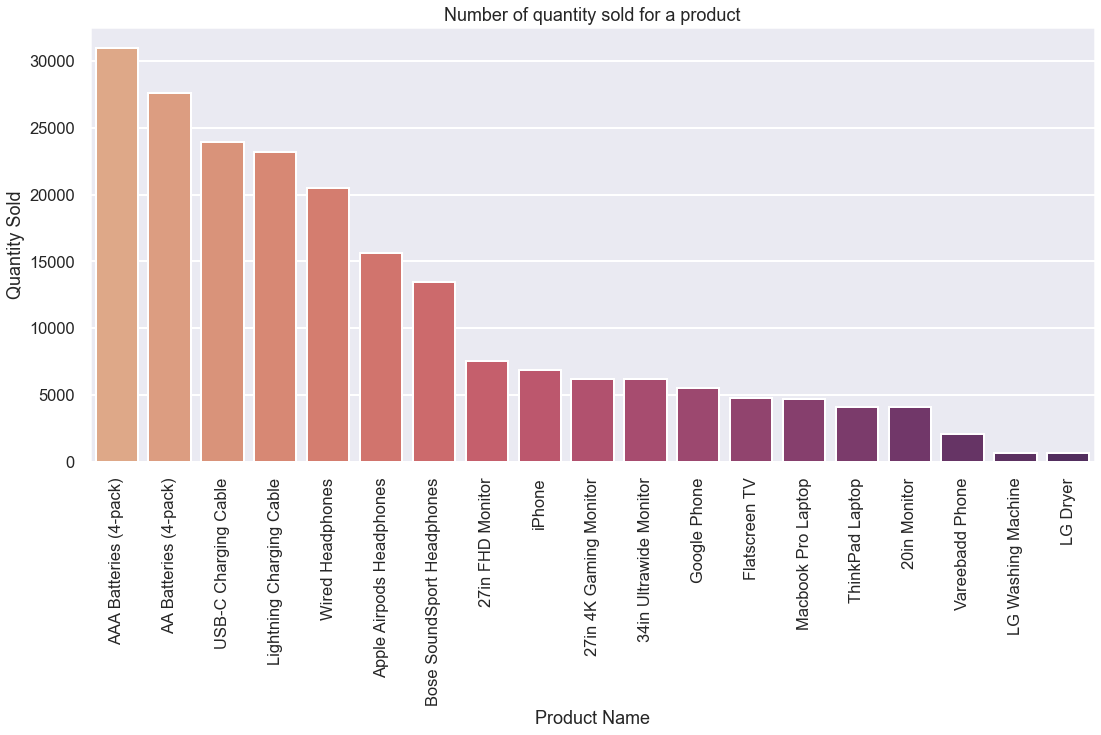

In [35]:
plt.figure(figsize = (18, 8)) # size of the plot

# barplot
sns.barplot(x = products_sold['product'], y =products_sold['quantity_ordered'] , palette = 'flare')
_ = plt.xticks(rotation = 90,
              horizontalalignment = 'center',
              fontweight = 'light')
plt.title('Number of quantity sold for a product') # title
plt.xlabel('Product Name') # xlabel
plt.ylabel('Quantity Sold') # ylablel
plt.show()

__Observations:__

* Here we can see that AAA Batteries, AA Batteries, USB-C Charging Cable are the top 3 items that are sold the most for the year 2019.
* Vareebadd Phone, LG Washing Machine, LG Dryer are the items that are sold the least.

### Best time to put out an advertisement

In [36]:
data.head(2)

,order_id,product,quantity_ordered,price_each,order_day_num,order_month,order_year,order_day_name,order_time_hour,order_time_min,street_name,city_name,state_name,zip_code,total_price
0,176558,USB-C Charging Cable,2,11.95,19,4,2019,4,8,46,1st St,Dallas,TX,75001,23.90
2,176559,Bose SoundSport Headphones,1,99.99,7,4,2019,6,22,30,Chestnut St,Boston,MA,02215,99.99


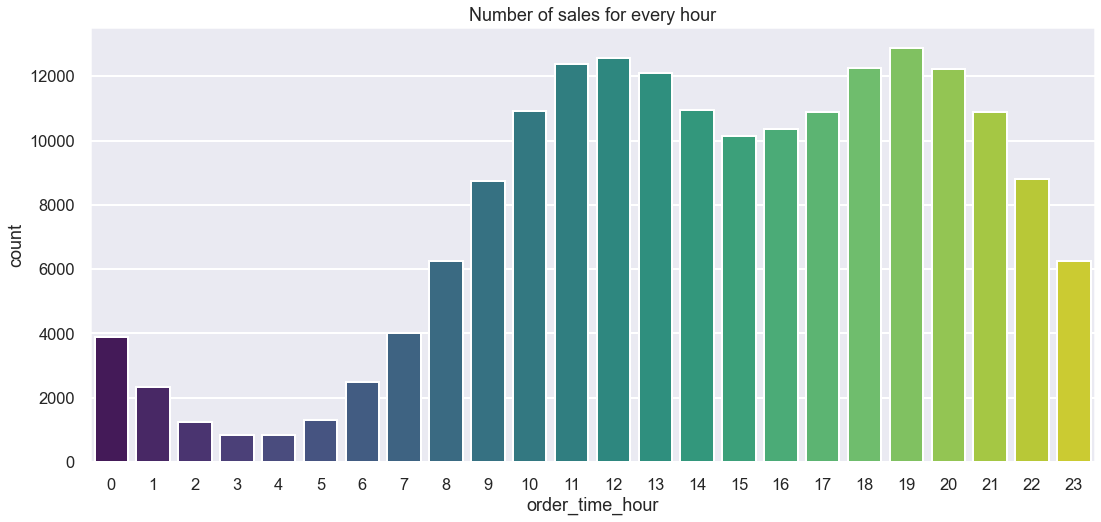

In [37]:
plt.figure(figsize = (18, 8))
sns.countplot(data['order_time_hour'], palette = 'viridis')
plt.title('Number of sales for every hour')
plt.show()

__Observations:__

* Here we can see that from midnight to early morning 4 there are fewer number of sales.
* From 5 am to 12 noon there in increase in sales as the hour increases.
* From 1 pm to 3 pm again there is a reduce in the sales.
* From 4 pm to 7 pm there is again an increase in the sales.
* After 8 pm till midnight there is a decrease in the sales.
* So, the best for an ad may be between 10 am and 2 pm and 5 pm and 9 pm.

### State wise Total Sales

In [38]:
data.head(3)

,order_id,product,quantity_ordered,price_each,order_day_num,order_month,order_year,order_day_name,order_time_hour,order_time_min,street_name,city_name,state_name,zip_code,total_price
0,176558,USB-C Charging Cable,2,11.95,19,4,2019,4,8,46,1st St,Dallas,TX,75001,23.90
2,176559,Bose SoundSport Headphones,1,99.99,7,4,2019,6,22,30,Chestnut St,Boston,MA,02215,99.99
3,176560,Google Phone,1,600.00,12,4,2019,4,14,38,Spruce St,Los Angeles,CA,90001,600.00


In [39]:
state_total_sales = data.groupby('state_name')['total_price'].agg(np.sum).reset_index().sort_values(by = 'total_price',
                                                                                                   ascending = False)
state_total_sales

,state_name,total_price
0,CA,1.370305e+07
4,NY,4.661867e+06
6,TX,4.583418e+06
2,MA,3.658628e+06
1,GA,2.794199e+06
7,WA,2.745046e+06
5,OR,1.870011e+06
3,ME,4.493214e+05


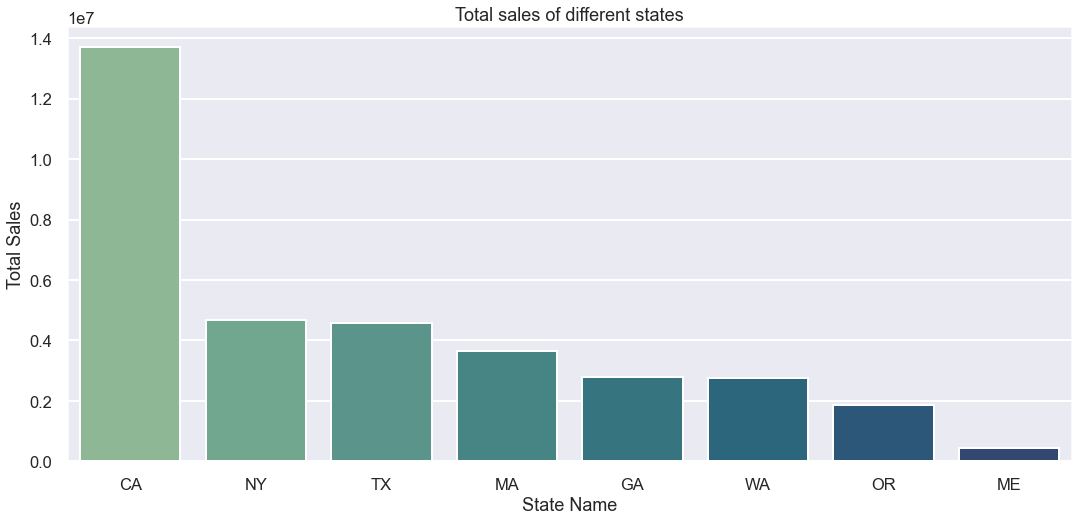

In [40]:
plt.figure(figsize = (18, 8)) # size of the plot

# barplot
sns.barplot(x = state_total_sales['state_name'], y = state_total_sales['total_price'],
            palette = 'crest')
plt.title('Total sales of different states') # title
plt.xlabel('State Name') # xlabel
plt.ylabel('Total Sales') # ylablel
plt.show()

__Observations:__

* Here we can see that California has a higher sales than New York, Texax, Massachusetts combined.
* The reason can be that California has a higher population compared to other states present in the dataset.


### Order ID with the largest purchase

In [41]:
order_id = data.groupby('order_id')['total_price'].agg(np.sum).reset_index().sort_values(by = 'total_price',
                                                                             ascending = False).head(10)
order_id

,order_id,total_price
39835,181069,3779.99
69058,210292,3400.00
59294,200528,3400.00
40310,181544,3400.00
165919,307153,2699.99
46853,188087,2699.99
47973,189207,2699.99
35948,177182,2699.99
120449,261683,2699.99
65179,206413,2400.00


In [42]:
data[data['order_id'].isin(order_id['order_id'])][['order_id', 'product','order_month','total_price']]

,order_id,product,order_month,total_price
654,177182,Macbook Pro Laptop,4,1700.00
655,177182,ThinkPad Laptop,4,999.99
4717,181069,Macbook Pro Laptop,4,3400.00
4718,181069,34in Ultrawide Monitor,4,379.99
5219,181544,Macbook Pro Laptop,4,3400.00
12087,188087,ThinkPad Laptop,4,999.99
12088,188087,Macbook Pro Laptop,4,1700.00
13268,189207,Macbook Pro Laptop,4,1700.00
13269,189207,ThinkPad Laptop,4,999.99
42441,307153,ThinkPad Laptop,12,999.99


__Observations:__

* Here we can see that the top 10 highest purchase all contain electronic gadgets.

## Conclusion

* The dataset had 186850 rows and 6 columns.
* Sales at the end of the year have a good number of sales compared to the start of the year.
* AAA and AA baterries are the most sold products whereas both the LG products in the dataset are the least sold.
* The best time for an ad may be between 10 am and 2 pm and 5 pm and 9 pm since they have a higher numnber of sales compared to other hours in the day.
* California dominates the total sales out of other states in the dataset.
* All the top 10 purchases are either mobile, laptop or part of a computer.